In [3]:
# importar dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## CARGA DEL DATASET & DESCRIPTIVA DE VARIABLES

Cargamos el dataset elegido para el proyecto. Tenemos datos de motociclismo desde la temporada 1949 hasta la temporada 2021. 

Las columnas son las siguientes: 

<table>
    <tr>
        <th>Columna</th>
        <th>Descripción</th>
    </tr>
    <tr>
        <td><strong>year</strong></td>
        <td>Año de la temporada (desde 1949 hasta 2021)</td>
    </tr>
    <tr>
        <td><strong>category</strong></td>
        <td>Cilindrada: 50cc, 80cc, 125cc, 250cc, 350cc, 500cc, MotoGP, Moto2, Moto3 y MotoE. Dependiendo de la década van apareciendo algunas y desapareciendo otras; por ejemplo, en el año 2002 la categoría reina de 500cc pasa a llamarse MotoGP, y pocos años después 125cc y 250cc pasan a llamarse Moto3 y Moto2, respectivamente. Además, existen algunas categorías que duraron muy poco tiempo en las primeras décadas, como la de 350cc.</td>
    </tr>
    <tr>
        <td><strong>sequence</strong></td>
        <td>Orden del gran premio pertinente dentro del calendario de una temporada (la primera carrera tiene el valor de 1, la siguiente el 2, etc.)</td>
    </tr>
    <tr>
        <td><strong>shortname</strong></td>
        <td>Abreviatura del gran premio, por ejemplo: RSA es la abreviatura del Gran Premio de Sudáfrica, SPA la del Gran Premio de España en Jerez y VAL la del Gran Premio de la Comunidad Valenciana en el circuito de Ricardo Tormo.</td>
    </tr>
    <tr>
        <td><strong>circuit_name</strong></td>
        <td>Nombre del circuito</td>
    </tr>
    <tr>
        <td><strong>team_name</strong></td>
        <td>Nombre del equipo (Repsol Honda Team, Yamaha Factory Racing entre otros)</td>
    </tr>
    <tr>
        <td><strong>bike_name</strong></td>
        <td>Marca de la moto (Ducati, Honda, Aprilia, etc.)</td>
    </tr>
    <tr>
        <td><strong>position</strong></td>
        <td>Posición en la que quedó un piloto en el gran premio pertinente</td>
    </tr>
    <tr>
        <td><strong>points</strong></td>
        <td>Puntos que obtuvo el piloto en ese gran premio (puntúan los quince primeros mediante el sistema 25, 20, 16, 13, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1)</td>
    </tr>
    <tr>
        <td><strong>number</strong></td>
        <td>Número del piloto (algunos pilotos como Valentino Rossi llevan siempre el mismo número a lo largo de su carrera mientras que otros lo cambian en algún momento o deciden correr con el número correspondiente a la clasificación en el mundial del año anterior. Esto suele ser más típico cuando un piloto gana el campeonato, que al año siguiente compita con el número 1).</td>
    </tr>
    <tr>
        <td><strong>country</strong></td>
        <td>Abreviatura del país del piloto</td>
    </tr>
    <tr>
        <td><strong>speed</strong></td>
        <td>Velocidad media del piloto durante el gran premio</td>
    </tr>
    <tr>
        <td><strong>time</strong></td>
        <td>Tiempo que tarda el piloto ganador en completar un gran premio en caso de ganar o distancia respecto al ganador del piloto pertinente</td>
    </tr>
</table>

In [4]:
data = pd.read_csv('data/FILTERED_ROWS.csv')
data.head()

,year,category,sequence,shortname,circuit_name,rider,rider_name,team_name,bike_name,position,points,number,country,speed,time
0,1949,500cc,1,TT,Isle of Man,6,"Daniell, Harold",?,Norton,1,10.0,NaN,GB,NaN,3:02'18.600
1,1949,500cc,1,TT,Isle of Man,7,"Lockett, John",?,Norton,2,8.0,NaN,GB,NaN,0 Lap
2,1949,500cc,1,TT,Isle of Man,8,"Lyons, Ernie",?,Velocette,3,7.0,NaN,IE,NaN,0 Lap
3,1949,500cc,1,TT,Isle of Man,5,"Bell, Artie",?,Norton,4,6.0,NaN,IE,NaN,0 Lap
4,1949,500cc,1,TT,Isle of Man,12,"Jensen, Sid",?,Triumph,5,5.0,NaN,NZ,NaN,0 Lap


In [5]:
data = data[data['year'] >= 2000]
data = data.reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29931 entries, 0 to 29930
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          29931 non-null  int64  
 1   category      29931 non-null  object 
 2   sequence      29931 non-null  int64  
 3   shortname     29931 non-null  object 
 4   circuit_name  29931 non-null  object 
 5   rider         29931 non-null  int64  
 6   rider_name    29931 non-null  object 
 7   team_name     29931 non-null  object 
 8   bike_name     29931 non-null  object 
 9   position      29931 non-null  int64  
 10  points        29931 non-null  float64
 11  number        24804 non-null  float64
 12  country       29931 non-null  object 
 13  speed         28939 non-null  float64
 14  time          29930 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 3.4+ MB


### LIMPIEZA DE DATOS

Tenemos 3 columnas con datos faltantes: number, speed y time.

Columna number: Se realizará una imputación mediante números aleatorios de una distribución uniforme de 0 a 100.

Columna Speed: Los valores faltantes son debidos a abandonos ocurridos en la salida o la primera vuelta, por lo que no ha sido posible recoger una velocidad media para esos pilotos (por ejemplo, el piloto español Jorge Lorenzo sufrió una caída en el gran premio de Australia del 2009 y por ello la speed recogida para él en esta carrera es un dato faltante.) Se imputarán estos valores con la media de velocidad para los pilotos de esa misma cilindrada en esa carrera.

Columna time: Se eliminará la fila correspondiente al valor faltante para simplificar.

In [6]:
# Crear un nueva columna con la categoría, ronda y año de la carrera
data['carrera'] = data['category'].astype(str) + " " + "Round" +data['sequence'].astype(str)+ " " + data['year'].astype(str)

# Obtener la media de speed para cada carrera
data['mean_speed'] = data.groupby('carrera')['speed'].transform('mean')

# Imputar los valores faltantes de mean_speed con el promedio de la velocidad
data['mean_speed'] = data['mean_speed'].fillna(data['mean_speed'].mean())

# Imputar los valores faltantes de speed con el valor de mean_speed que haya en esa fila
data['speed'] = data['speed'].fillna(data['mean_speed'])

data.drop(columns=['mean_speed'], inplace=True)

Eliminamos la fila correspondiente al valor faltante de Time.

In [7]:
if len(data) == 29931:
    data = data.drop([16097])
else:
    print('Ya se eliminó la fila con nulo')

data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 29930
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          29930 non-null  int64  
 1   category      29930 non-null  object 
 2   sequence      29930 non-null  int64  
 3   shortname     29930 non-null  object 
 4   circuit_name  29930 non-null  object 
 5   rider         29930 non-null  int64  
 6   rider_name    29930 non-null  object 
 7   team_name     29930 non-null  object 
 8   bike_name     29930 non-null  object 
 9   position      29930 non-null  int64  
 10  points        29930 non-null  float64
 11  number        24803 non-null  float64
 12  country       29930 non-null  object 
 13  speed         29930 non-null  float64
 14  time          29930 non-null  object 
 15  carrera       29930 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 3.9+ MB


Imputamos los valores faltantes de la columna number.

In [8]:
numeros = np.random.randint(0, 100, size=data['number'].isnull().sum())
data.loc[data['number'].isnull(), 'number'] = numeros
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 29930 entries, 0 to 29930
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          29930 non-null  int64  
 1   category      29930 non-null  object 
 2   sequence      29930 non-null  int64  
 3   shortname     29930 non-null  object 
 4   circuit_name  29930 non-null  object 
 5   rider         29930 non-null  int64  
 6   rider_name    29930 non-null  object 
 7   team_name     29930 non-null  object 
 8   bike_name     29930 non-null  object 
 9   position      29930 non-null  int64  
 10  points        29930 non-null  float64
 11  number        29930 non-null  float64
 12  country       29930 non-null  object 
 13  speed         29930 non-null  float64
 14  time          29930 non-null  object 
 15  carrera       29930 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 3.9+ MB


## EDA

### Búsqueda de outliers en speed

In [8]:
tabla1 = data['speed'].describe().to_frame()
tabla1.to_csv('tablas/tabla1.csv')

cuantiles = pd.DataFrame(data['speed'].quantile([0,0.025,0.25, 0.5, 0.75, 0.975, 1]))
cuantiles = cuantiles.reset_index()
cuantiles.columns = ['percentil', 'speed']
cuantiles.to_csv('tablas/cuantiles.csv')

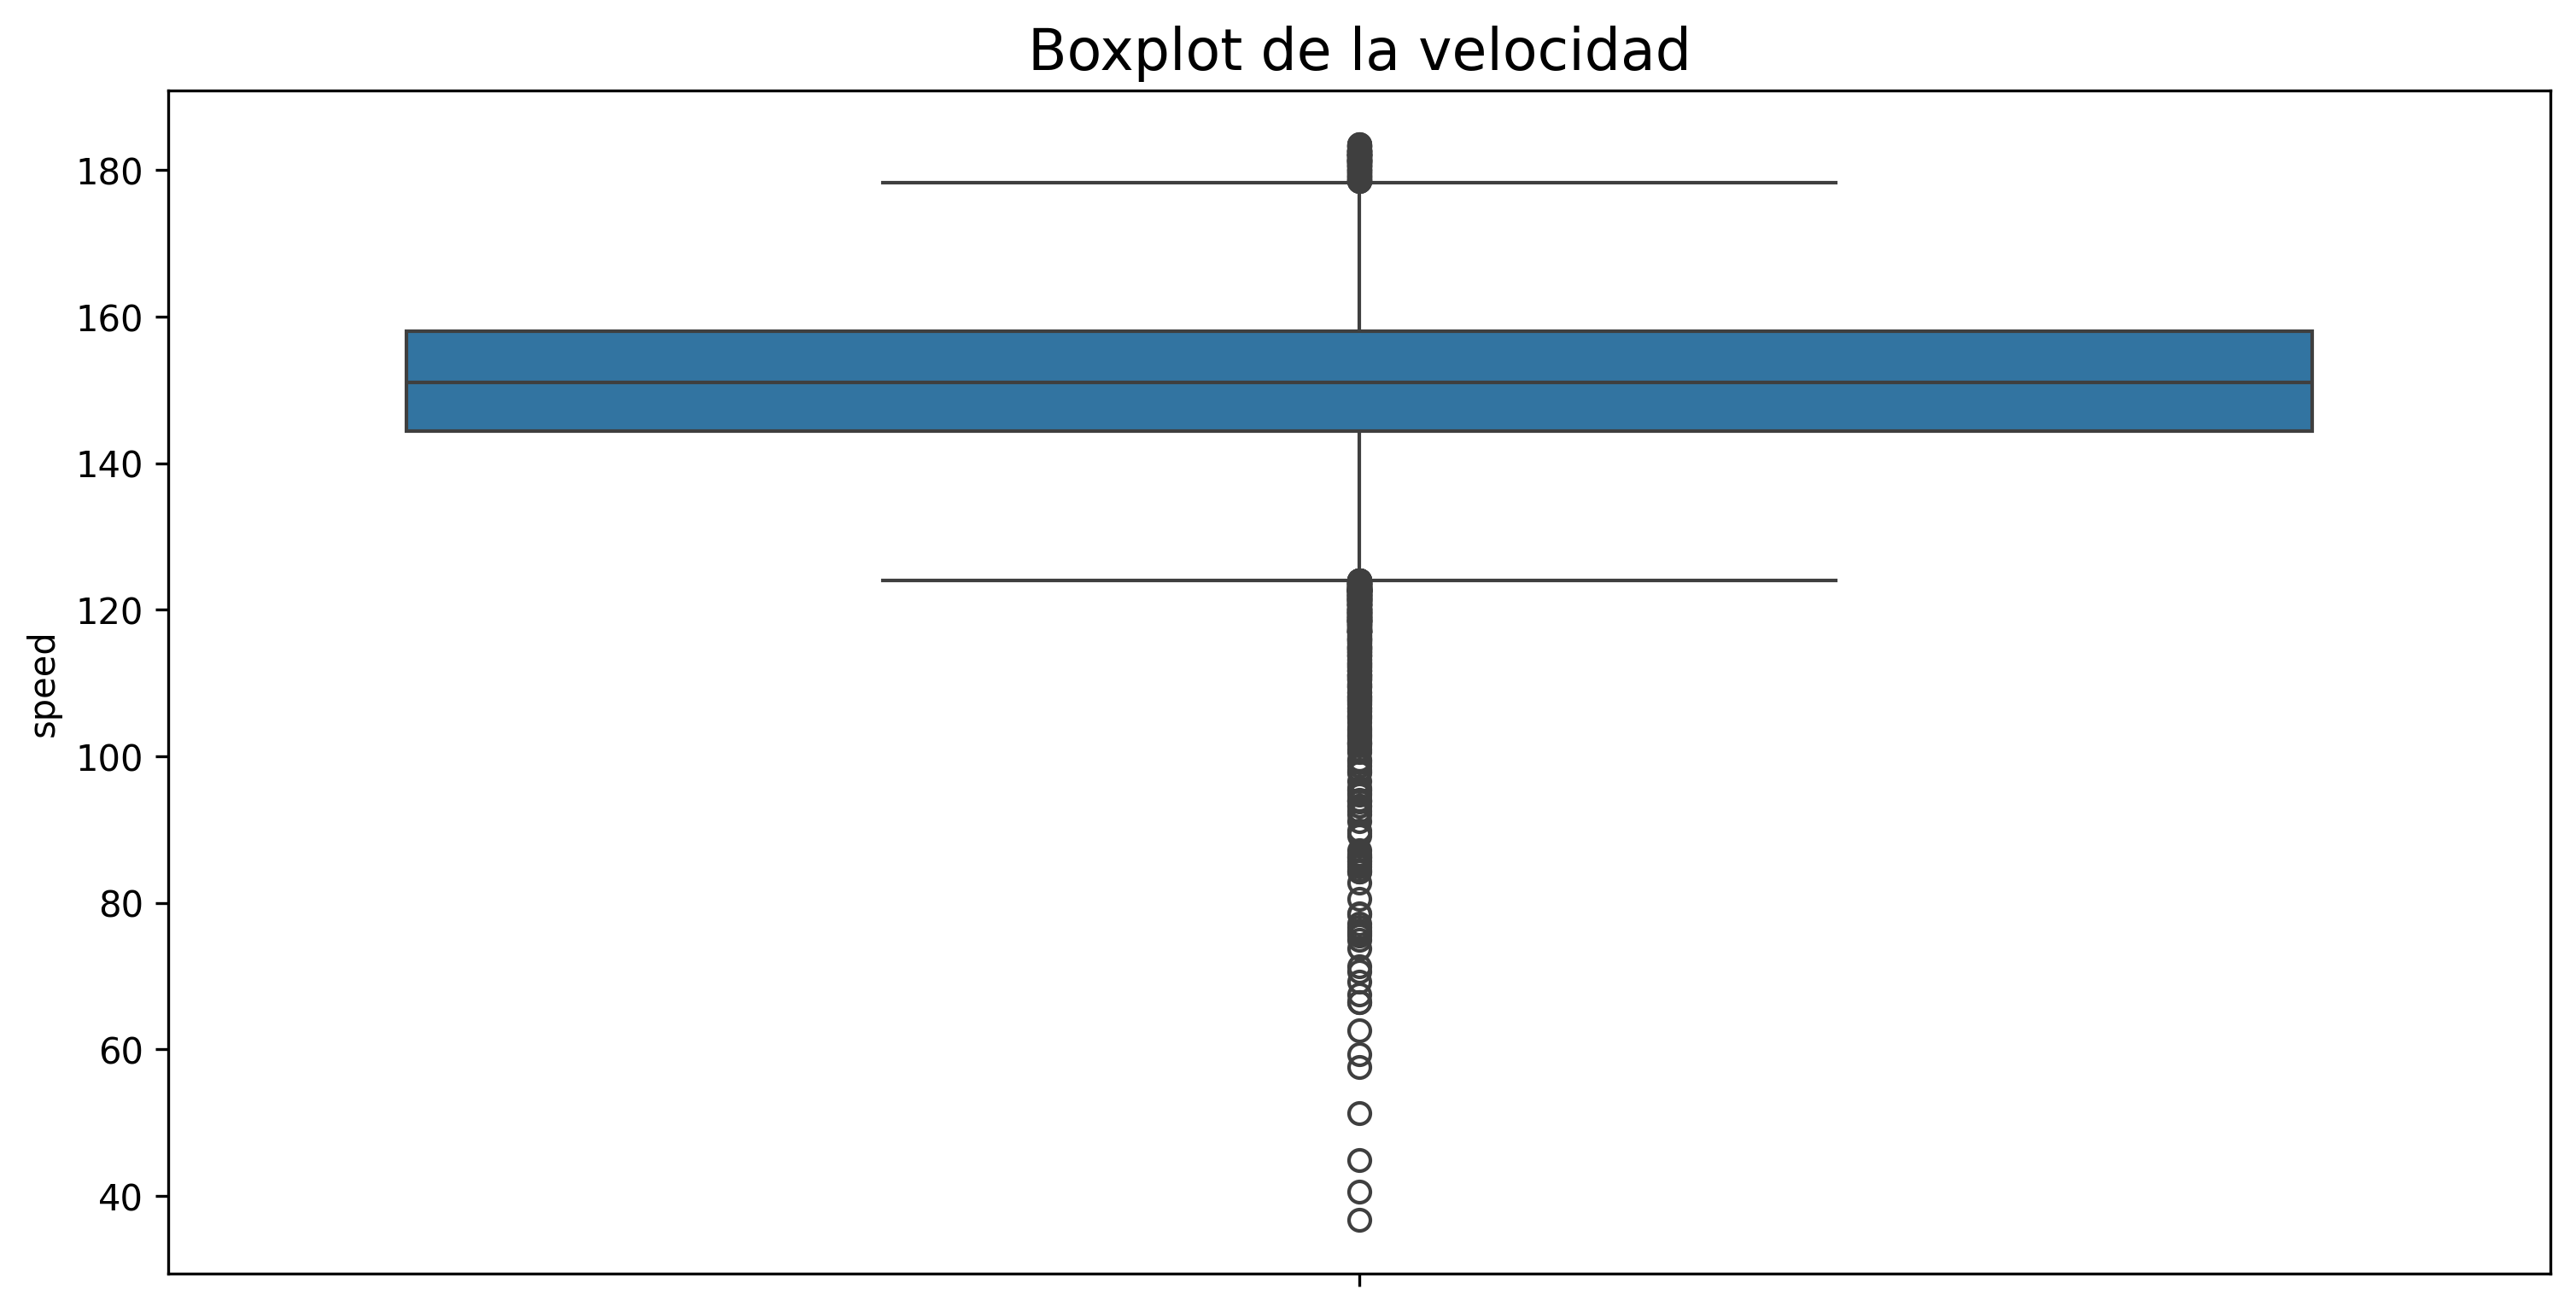

In [9]:
# Boxplot de la variable speed
plt.figure(figsize=(12, 6), dpi=300)
sns.boxplot(data['speed'])
plt.title('Boxplot de la velocidad', fontsize=16)
plt.savefig('img/boxplot_speed.jpg', dpi=300)
plt.show()

In [10]:
mask = pd.Series([True] * len(data))



In [11]:
Q1 = data['speed'].quantile(0.25)
Q3 = data['speed'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
mask &= (data['speed'] >= lower_bound) & (data['speed'] <= upper_bound)

### Análisis de la velocidad

In [20]:
df1 = data[(data['category'] == 'MotoGP') & (data['year'] == 2021) & (data['sequence'] == 16)][['rider_name', 'speed']]
df2 = df1[['rider_name','speed']].head(3)
df3 = df1[['rider_name','speed']].tail(3)

df2.to_csv('tablas/top3.csv')
df3.to_csv('tablas/last3.csv')

Creación de gráficos en de densidad con el suavizado de Kernel para la velocidad media por carrera desde el año 2000. En la segunda gráfica se desglosa en tres categorías (categoría reina, segunda categoría y tercera categoría).

C:\Users\estev\AppData\Local\Temp\ipykernel_18316\463635797.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['speed'], shade=True)


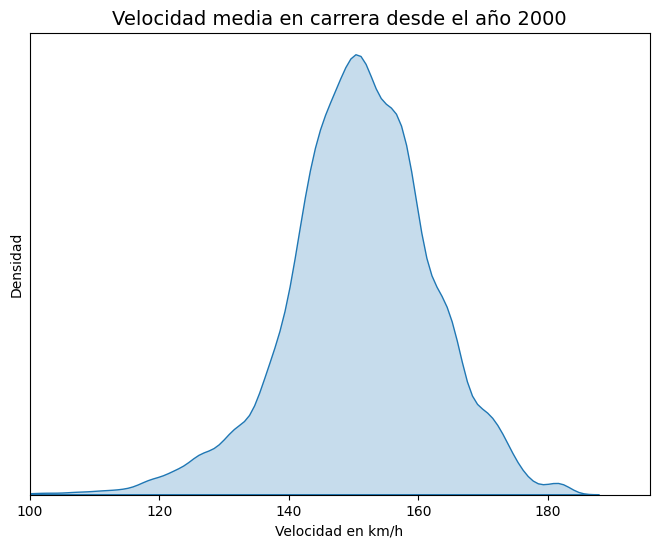

In [68]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data['speed'], shade=True)
plt.title('Velocidad media en carrera desde el año 2000', fontsize=14)
plt.xlabel('Velocidad en km/h')
plt.ylabel('Densidad')
plt.xlim(left=100)
plt.yticks([])
plt.savefig('img/velocidad.jpg', dpi=300)
plt.show()

C:\Users\estev\AppData\Local\Temp\ipykernel_18316\377003276.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['category'].isin(['Moto3', '125cc'])]['speed'], shade=True, label='Moto3/125cc')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\377003276.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['category'].isin(['Moto2', '250cc'])]['speed'], shade=True, label='Moto2/250cc')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\377003276.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['category'].isin(['MotoGP', '500cc'])]['speed'], shade=True, label='MotoGP/500cc')


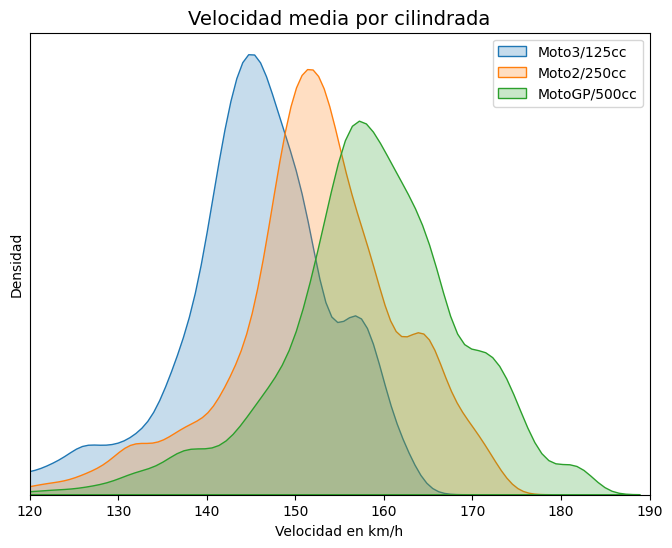

In [69]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data[data['category'].isin(['Moto3', '125cc'])]['speed'], shade=True, label='Moto3/125cc')
sns.kdeplot(data[data['category'].isin(['Moto2', '250cc'])]['speed'], shade=True, label='Moto2/250cc')
sns.kdeplot(data[data['category'].isin(['MotoGP', '500cc'])]['speed'], shade=True, label='MotoGP/500cc')
plt.title('Velocidad media por cilindrada', fontsize=14)
plt.xlabel('Velocidad en km/h')
plt.ylabel('Densidad')
plt.xlim(left=120)
plt.xlim(right=190)
plt.yticks([])
plt.legend()
plt.savefig('img/velocidad_3_jorobas.jpg', dpi=300)
plt.show()


#### Cantidad carreras que se han corrido para cada cilindrada desde el año 2000

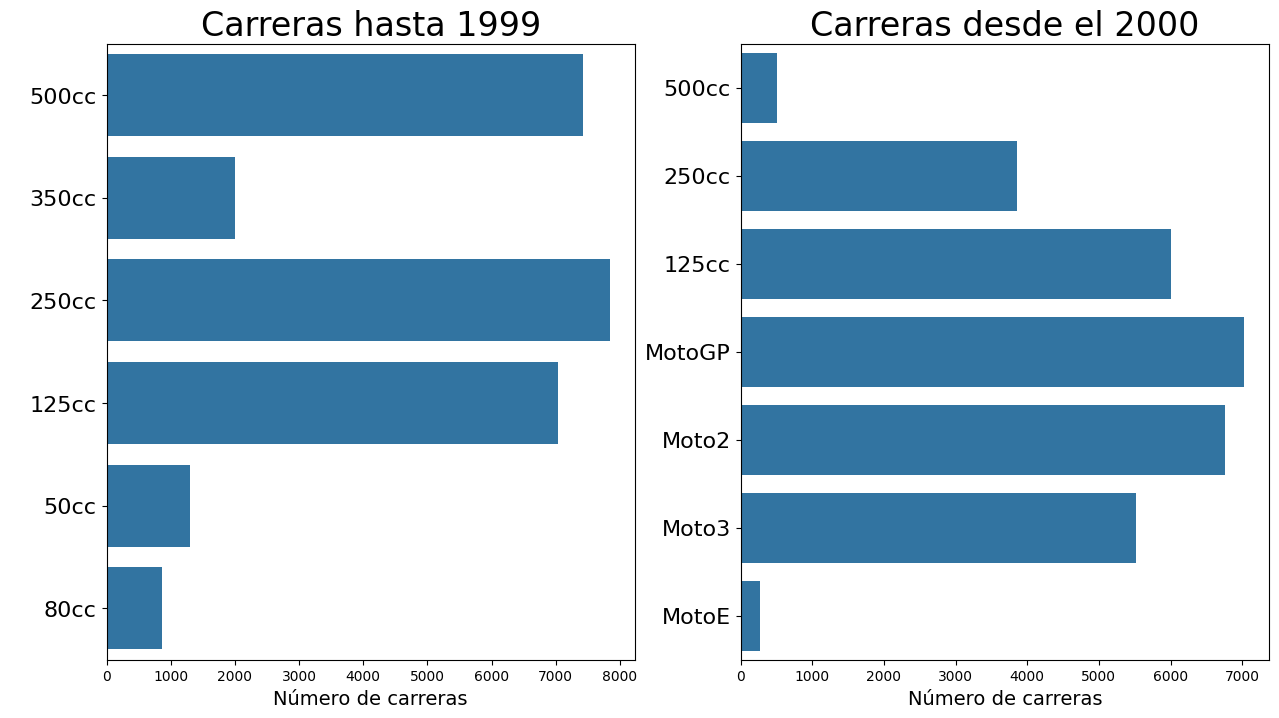

In [14]:
cilindradas_data = pd.read_csv('data/FILTERED_ROWS.csv')
cilindradas_data = cilindradas_data[cilindradas_data['year'] <= 1999]
import seaborn as sns

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.xlabel('Número de carreras', fontsize=14)
plt.ylabel(' ')
sns.countplot(data=cilindradas_data, y='category', orient='h')
plt.title('Carreras hasta 1999', fontsize=24)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)

plt.subplot(1, 2, 2)
plt.xlabel('Número de carreras', fontsize=14)
plt.ylabel(' ')
sns.countplot(data=data, y='category', orient='h')
plt.title('Carreras desde el 2000', fontsize=24)
plt.xticks(fontsize=10)
plt.yticks(fontsize=16)

plt.savefig('img/cilindradas_antiguas.jpg', dpi=300)
plt.show()


C:\Users\estev\AppData\Local\Temp\ipykernel_8648\606516279.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cilindradas_data[cilindradas_data['category']=='125cc']['speed'], shade=True, label='125cc')
C:\Users\estev\AppData\Local\Temp\ipykernel_8648\606516279.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cilindradas_data[cilindradas_data['category']=='250cc']['speed'], shade=True, label='250cc')
C:\Users\estev\AppData\Local\Temp\ipykernel_8648\606516279.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cilindradas_data[cilindradas_data['category']=='500cc']['speed'], shade=True, label='500cc')


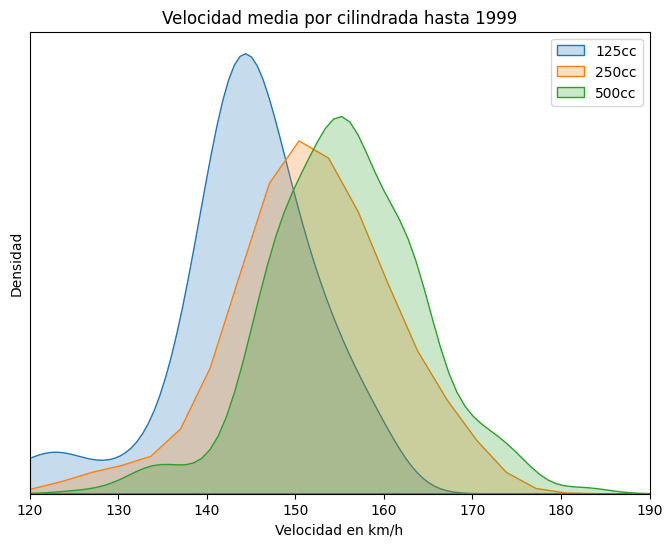

In [15]:
plt.figure(figsize=(8, 6))
sns.kdeplot(cilindradas_data[cilindradas_data['category']=='125cc']['speed'], shade=True, label='125cc')
sns.kdeplot(cilindradas_data[cilindradas_data['category']=='250cc']['speed'], shade=True, label='250cc')
sns.kdeplot(cilindradas_data[cilindradas_data['category']=='500cc']['speed'], shade=True, label='500cc')
plt.title('Velocidad media por cilindrada hasta 1999')
plt.xlabel('Velocidad en km/h')
plt.ylabel('Densidad')
plt.xlim(left=120)
plt.xlim(right=190)
plt.yticks([])
plt.legend()
plt.savefig('img/velocidades_antiguas.jpg', dpi=300)
plt.show()

In [20]:
from dotenv import load_dotenv
import os


In [32]:
# directorio actual
directorio = os.getcwd()
print(directorio)

c:\Users\estev\OneDrive\Documentos\GitHub\MOTOCICLISMO


In [33]:
load_dotenv()

# Comprobar si la variable de entorno se ha cargado correctamente
report_url_victorias = os.getenv("POWERBI_URL_victorias")

# Imprimir el valor de la variable
if report_url_victorias:
    print("URL cargada correctamente:", report_url_victorias)
else:
    print("No se pudo cargar la URL desde .env")


URL cargada correctamente: https://app.powerbi.com/view?r=eyJrIjoiNDA4YTM3YjktOGUyYy00ZTBhLTk3ODEtY2NiMmEyOThkNmYyIiwidCI6IjhhZWJkZGI2LTM0MTgtNDNhMS1hMjU1LWI5NjQxODZlY2M2NCIsImMiOjl9


### Máximos ganadores

Y cuáles han sido los pilotos que más veces se han subido al primer cajón desde el año 2000?

In [19]:
#  Pilotos con más victorias en MotoGP y 500cc desde el 2000 en adelante
data_gp = data[data['category'].isin(['MotoGP', '500cc'])]
data_gp = data_gp[data_gp['position'] == 1]
data_gp = data_gp['rider_name'].value_counts().head(10)
data_gp = data_gp.reset_index()
data_gp.columns = ['Piloto', 'Victorias']
data_gp

data_250cc = data[data['category'].isin(['Moto2', '250cc'])]
data_250cc = data_250cc[data_250cc['position'] == 1]
data_250cc = data_250cc['rider_name'].value_counts().head(10)
data_250cc = data_250cc.reset_index()
data_250cc.columns = ['Piloto', 'Victorias']
data_250cc

data_125cc = data[data['category'].isin(['Moto3', '125cc'])]
data_125cc = data_125cc[data_125cc['position'] == 1]
data_125cc = data_125cc['rider_name'].value_counts().head(10)
data_125cc = data_125cc.reset_index()
data_125cc.columns = ['Piloto', 'Victorias']
data_125cc

,Piloto,Victorias
0,"Terol, Nicolas",13
1,"Fenati, Romano",13
2,"Viñales, Maverick",12
3,"Mir, Joan",11
4,"Ui, Youichi",10
5,"Marquez, Marc",10
6,"Talmacsi, Gabor",9
7,"Salom, Luis",9
8,"Rins, Alex",8
9,"Bautista, Alvaro",8


Y si mirásemos quienes fueron los afortunados hasta esta fecha?

In [ ]:
cilindradas_500 = cilindradas_data[cilindradas_data['category'].isin(['500cc'])]
cilindradas_500 = cilindradas_500[cilindradas_500['position'] == 1]
cilindradas_500 = cilindradas_500['rider_name'].value_counts().head(10)
cilindradas_500 = cilindradas_500.reset_index()
cilindradas_500.columns = ['Piloto', 'Victorias']
cilindradas_500


cilindradas_250 = cilindradas_data[cilindradas_data['category'].isin(['250cc'])]
cilindradas_250 = cilindradas_250[cilindradas_250['position'] == 1]
cilindradas_250 = cilindradas_250['rider_name'].value_counts().head(10)
cilindradas_250 = cilindradas_250.reset_index()
cilindradas_250.columns = ['Piloto', 'Victorias']
cilindradas_250


cilindradas_125 = cilindradas_data[cilindradas_data['category'].isin(['125cc'])]
cilindradas_125 = cilindradas_125[cilindradas_125['position'] == 1]
cilindradas_125 = cilindradas_125['rider_name'].value_counts().head(10)
cilindradas_125 = cilindradas_125.reset_index()
cilindradas_125.columns = ['Piloto', 'Victorias']
cilindradas_250

,Piloto,Victorias
0,"Biaggi, Max",29
1,"Mang, Anton",29
2,"Read, Phil",23
3,"Cadalora, Luca",21
4,"Villa, Walter",19
5,"Hailwood, Mike",18
6,"Pons, Sito",15
7,"Lavado, Carlos",15
8,"Harada, Tetsuya",14
9,"Rossi, Valentino",14


### Naciones que más han ganado

Y qué ocurre cuando metemos en la ecuación las nacionalidades? Hay alguna que sea claramente dominante? Ha habido un cambio de paradigma desde antes del año 2000 hasta después?. 

Veamos, en primer lugar, cuáles son las naciones que más han ganado desde que se tiene registro en cualquiera de las categorías.

In [59]:
cilindradas_data = pd.read_csv('data/FILTERED_ROWS.csv')

paises_all = cilindradas_data
paises_all = paises_all[paises_all['position'] == 1]
paises_all = paises_all['country'].value_counts().head(10)
paises_all = paises_all.reset_index()
paises_all.columns = ['country', 'Victorias']
paises_all.to_csv('tablas/paises_all.csv')
paises_all

,country,Victorias
0,IT,811
1,ES,650
2,GB,366
3,AU,182
4,DE,169
5,US,168
6,JP,166
7,FR,87
8,CH,71
9,RH,60


Hagamos lo mismo pero sólo con la categoría reina: 500cc y MotoGP.

In [60]:
cilindradas_data = pd.read_csv('data/FILTERED_ROWS.csv')

paises_500 = cilindradas_data[cilindradas_data['category'].isin(['500cc','MotoGP'])]
paises_500 = paises_500[paises_500['position'] == 1]
paises_500 = paises_500['country'].value_counts().head(10)
paises_500 = paises_500.reset_index()
paises_500.columns = ['country', 'Victorias']
paises_500.to_csv('tablas/paises_500GP.csv')
paises_500

,country,Victorias
0,IT,247
1,ES,179
2,US,149
3,GB,137
4,AU,127
5,RH,12
6,JP,11
7,FR,10
8,NL,7
9,IE,6


Finalmente, hagamos este mismo proceso pero para antes del año 2000.

In [61]:
cilindradas_data = pd.read_csv('data/FILTERED_ROWS.csv')
cilindradas_data = cilindradas_data[cilindradas_data['year'] <= 1999]

paises_all = cilindradas_data
paises_all = paises_all[paises_all['position'] == 1]
paises_all = paises_all['country'].value_counts().head(10)
paises_all = paises_all.reset_index()
paises_all.columns = ['country', 'Victorias']
paises_500.to_csv('tablas/paises_antes.csv')
paises_all

,country,Victorias
0,IT,511
1,GB,335
2,ES,187
3,US,161
4,DE,145
5,AU,116
6,JP,102
7,RH,60
8,CH,52
9,NL,50


Vemos que España sigue figurando en la aprte alta de la tabla, èro ya está a una gran distancia de Italia en número de victorias y a bastante distancia de Gran Bretaña. 
Hagamos el mismo proceso pero sólo para la categoría reina, en este caso 500cc.

In [62]:
cilindradas_data = pd.read_csv('data/FILTERED_ROWS.csv')
cilindradas_data = cilindradas_data[cilindradas_data['year'] <= 1999]

paises_500 = cilindradas_data[cilindradas_data['category'].isin(['500cc'])]
paises_500 = paises_500[paises_500['position'] == 1]
paises_500 = paises_500['country'].value_counts().head(10)
paises_500 = paises_500.reset_index()
paises_500.columns = ['country', 'Victorias']
paises_500.to_csv('tablas/paises_antes_500.csv')
paises_500

,country,Victorias
0,US,142
1,GB,134
2,IT,114
3,AU,81
4,ES,17
5,RH,12
6,JP,7
7,NL,7
8,IE,6
9,VE,3


El resultado es todavía más sorprendente: España apenas contaba con 17 victorias en el casillero! Cómo han cambiado las cosas desde entonces...

### Velocidad media por año y categoría

### Marcas más galardonadas

#### Resumen de las temporadas 2006, 2007 y 2008

C:\Users\estev\AppData\Local\Temp\ipykernel_8648\3659400021.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporada_2006 = data[data['year'] == 2006][data['category'] == 'MotoGP']


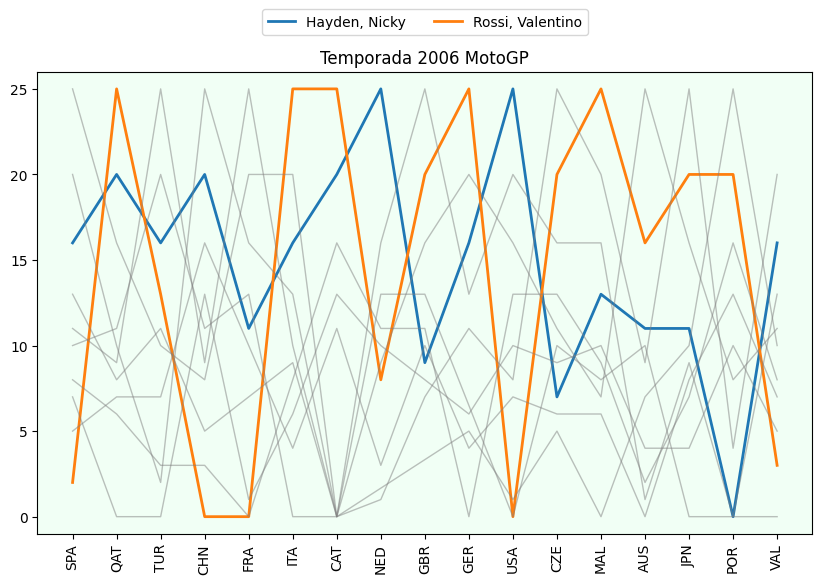

In [34]:
temporada_2006 = data[data['year'] == 2006][data['category'] == 'MotoGP']
top_10 = temporada_2006.groupby('rider_name').agg({'points':'sum'}).sort_values(by='points', ascending=False).head(10).index
pilotos = {}
for piloto in top_10:
    pilotos[piloto] = dict(zip(temporada_2006[temporada_2006['rider_name'] == piloto]['shortname'].tolist(), temporada_2006[temporada_2006['rider_name'] == piloto]['points'].tolist()))

plt.figure(figsize=(10, 6), facecolor='#ffffff')
for piloto, puntos in pilotos.items():
    if piloto in ['Hayden, Nicky', 'Rossi, Valentino']:
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=2)
    else:
        plt.plot(puntos.keys(), puntos.values(), label='_nolegend_', color='gray', alpha=0.5, linewidth=1)
plt.xticks(rotation=90)
plt.ylim(-1, 26)
plt.gca().set_facecolor('#f1fff5')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)
plt.title('Temporada 2006 MotoGP')
plt.savefig('img/2006.jpg', dpi=300)
plt.show()

C:\Users\estev\AppData\Local\Temp\ipykernel_8648\1067595198.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporada_2007 = data[data['year'] == 2007][data['category'] == 'MotoGP']


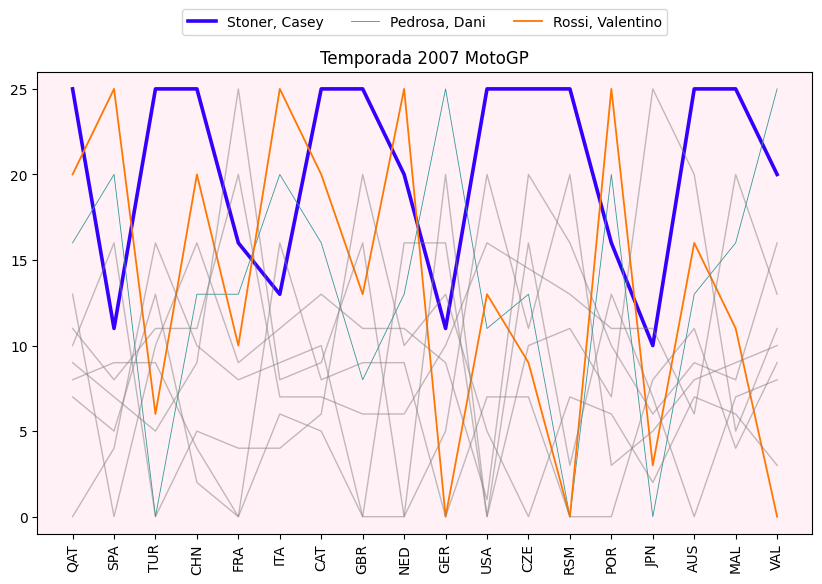

In [60]:
temporada_2007 = data[data['year'] == 2007][data['category'] == 'MotoGP']
top_10 = temporada_2007.groupby('rider_name').agg({'points':'sum'}).sort_values(by='points', ascending=False).head(10).index
pilotos = {}
for piloto in top_10:
    pilotos[piloto] = dict(zip(temporada_2007[temporada_2007['rider_name'] == piloto]['shortname'].tolist(), temporada_2007[temporada_2007['rider_name'] == piloto]['points'].tolist()))

plt.figure(figsize=(10, 6),facecolor='#ffffff')
for piloto, puntos in pilotos.items():
    if piloto in ['Stoner, Casey']:
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=2.6, color='#3300ff')
    elif piloto == 'Pedrosa, Dani':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=0.6, color='#339999')
    elif piloto == 'Rossi, Valentino':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=1.3, color='#ff7700')
    else:
        plt.plot(puntos.keys(), puntos.values(), label='_nolegend_', color='gray', alpha=0.5, linewidth=1)
plt.xticks(rotation=90)
plt.ylim(-1, 26)
plt.gca().set_facecolor('#fff1f5')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
plt.title('Temporada 2007 MotoGP')
plt.savefig('img/2007.jpg', dpi=300)
plt.show()

C:\Users\estev\AppData\Local\Temp\ipykernel_8648\1066823459.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporada_2008 = data[data['year'] == 2008][data['category'] == 'MotoGP']


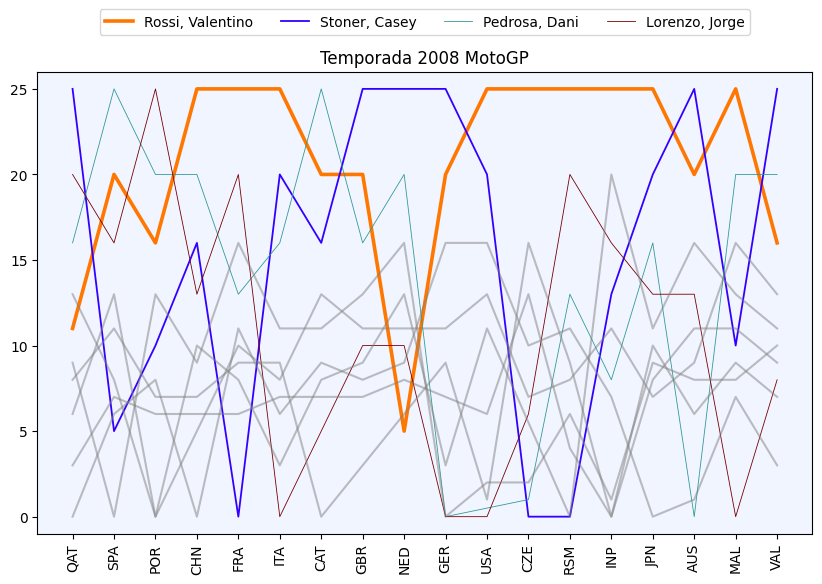

In [58]:
temporada_2008 = data[data['year'] == 2008][data['category'] == 'MotoGP']
top_10 = temporada_2008.groupby('rider_name').agg({'points':'sum'}).sort_values(by='points', ascending=False).head(10).index
pilotos = {}
for piloto in top_10:
    pilotos[piloto] = dict(zip(temporada_2008[temporada_2008['rider_name'] == piloto]['shortname'].tolist(), temporada_2008[temporada_2008['rider_name'] == piloto]['points'].tolist()))

plt.figure(figsize=(10, 6),facecolor='#ffffff')
for piloto, puntos in pilotos.items():
    if piloto in ['Rossi, Valentino']:
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=2.6, color='#ff7700')
    elif piloto == 'Pedrosa, Dani':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=0.6, color='#339999')
    elif piloto == 'Lorenzo, Jorge':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=0.6, color='#770000')
    elif piloto == 'Stoner, Casey':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=1.3, color='#3300ff')
    else:
        plt.plot(puntos.keys(), puntos.values(), label='_nolegend_', color='gray', alpha=0.5)
plt.xticks(rotation=90)
plt.ylim(-1, 26)
plt.gca().set_facecolor('#f1f5ff')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.title('Temporada 2008 MotoGP')
plt.savefig('img/2008.jpg', dpi=300)
plt.show()

C:\Users\estev\AppData\Local\Temp\ipykernel_8648\2254445554.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporada_2009 = data[data['year'] == 2009][data['category'] == 'MotoGP']


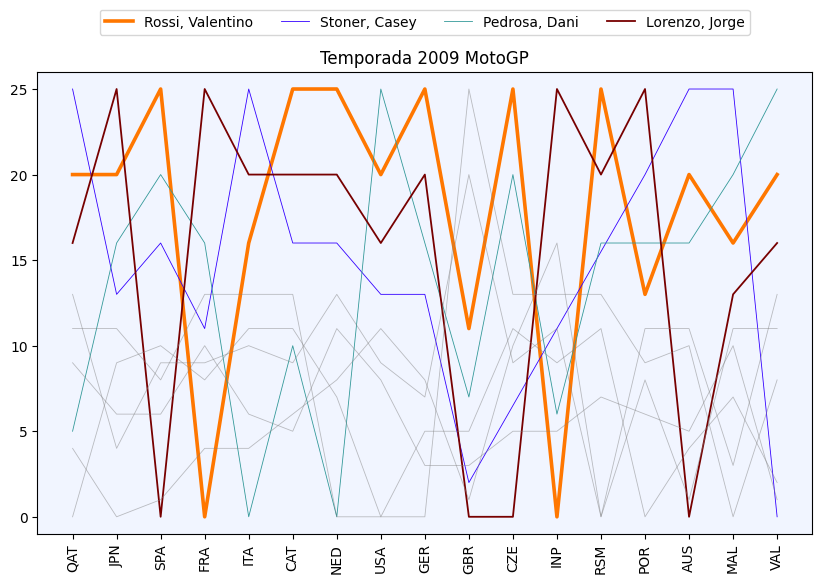

In [54]:
temporada_2009 = data[data['year'] == 2009][data['category'] == 'MotoGP']
top_10 = temporada_2008.groupby('rider_name').agg({'points':'sum'}).sort_values(by='points', ascending=False).head(10).index
pilotos = {}
for piloto in top_10:
    pilotos[piloto] = dict(zip(temporada_2009[temporada_2009['rider_name'] == piloto]['shortname'].tolist(), temporada_2009[temporada_2009['rider_name'] == piloto]['points'].tolist()))

plt.figure(figsize=(10, 6),facecolor='#ffffff')
for piloto, puntos in pilotos.items():
    if piloto in ['Rossi, Valentino']:
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=2.6, color='#ff7700')
    elif piloto == 'Pedrosa, Dani':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=0.6, color='#339999')
    elif piloto == 'Lorenzo, Jorge':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=1.3, color='#770000')
    elif piloto == 'Stoner, Casey':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=0.6, color='#3300ff')
    else:
        plt.plot(puntos.keys(), puntos.values(), label='_nolegend_', color='gray', alpha=0.5, linewidth=0.6)
plt.xticks(rotation=90)
plt.ylim(-1, 26)
plt.gca().set_facecolor('#f1f5ff')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.title('Temporada 2009 MotoGP')
plt.savefig('img/2009.jpg', dpi=300)
plt.show()

C:\Users\estev\AppData\Local\Temp\ipykernel_8648\3210474834.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temporada_2010 = data[data['year'] == 2010][data['category'] == 'MotoGP']


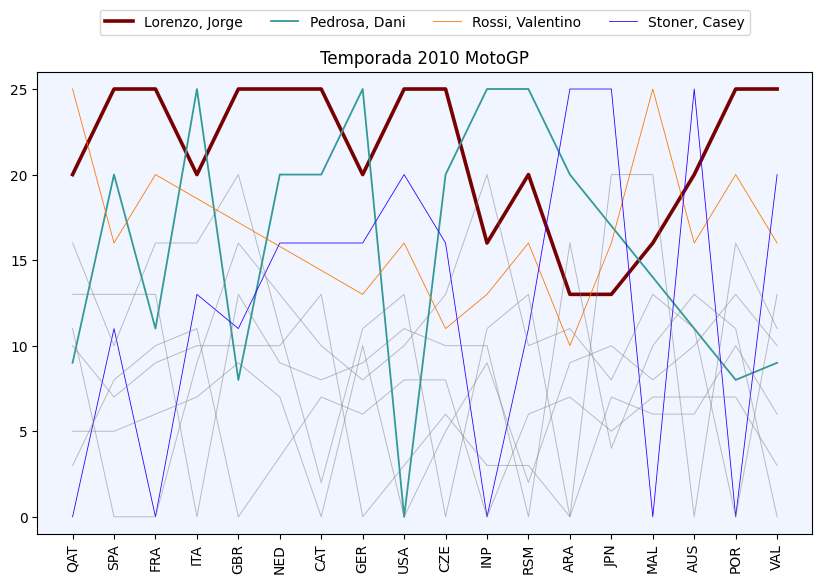

In [56]:
temporada_2010 = data[data['year'] == 2010][data['category'] == 'MotoGP']
top_10 = temporada_2010.groupby('rider_name').agg({'points':'sum'}).sort_values(by='points', ascending=False).head(10).index
pilotos = {}
for piloto in top_10:
    pilotos[piloto] = dict(zip(temporada_2010[temporada_2010['rider_name'] == piloto]['shortname'].tolist(), temporada_2010[temporada_2010['rider_name'] == piloto]['points'].tolist()))

plt.figure(figsize=(10, 6),facecolor='#ffffff')
for piloto, puntos in pilotos.items():
    if piloto in ['Lorenzo, Jorge']:
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=2.6, color='#770000')
    elif piloto == 'Pedrosa, Dani':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=1.3, color='#339999')
    elif piloto == 'Stoner, Casey':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=0.6, color='#3300ff')
    elif piloto == 'Rossi, Valentino':
        plt.plot(puntos.keys(), puntos.values(), label=piloto, linewidth=0.6, color='#ff7700')
    else:
        plt.plot(puntos.keys(), puntos.values(), label='_nolegend_', color='gray', alpha=0.5, linewidth=0.7)
plt.xticks(rotation=90)
plt.ylim(-1, 26)
plt.gca().set_facecolor('#f1f5ff')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.title('Temporada 2010 MotoGP')
plt.savefig('img/2010.jpg', dpi=300)
plt.show()

## Test de Correlación entre el año y la velocidad media

Se implementará un modelo de regresión lineal que ajuste la velocidad media con el año. Se realizará una prueba para cada categoría (tres pruebas en total).

$$ speed = \beta_{0} + \beta_{1} \cdot year + \epsilon$$

Queremos saber si el valor de la tendencia, es decir, de $\beta$ es estadísticamente diferente de cero. Tenemos, pues, dos hipótesis:

- Hipótesis nula ($H_{0}$) $\rightarrow$ El valor de la tendencia no es diferente de 0.
- Hipótesis alternativa ($H_{1}$) $\rightarrow$ El valor de la tendencia es diferente de 0.

De ser así, rechazamos la hipótesis $H_{0}$.

In [22]:
# Media de speed por año en la categoría MotoGP y 500cc
moto_gp = data[data['category'].isin(['MotoGP', '500cc'])]
moto_gp = moto_gp.groupby(['year']).agg({'speed':'mean'}).reset_index()

# Hacer un modelo de regresión lineal
import statsmodels.api as sm
X = sm.add_constant(moto_gp['year'])
y = moto_gp['speed']
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

#residuals = model.resid
#sm.qqplot(residuals, line='s')
#plt.show()

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     106.9
Date:                Mon, 25 Nov 2024   Prob (F-statistic):           1.81e-09
Time:                        14:33:29   Log-Likelihood:                -39.359
No. Observations:                  22   AIC:                             82.72
Df Residuals:                      20   BIC:                             84.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -902.5730    102.599     -8.797      0.0

Como se puede observar en el Summary, la fórmula de nuestro modelo de regresión es: 

$$ speed = -903 + 0.5275 \cdot year + \epsilon$$

El $p$ valor de $\Beta_{1}$ es de 0.000, lo que indica que la tendencia es estadísticamente distinta de cero. En concreto, para cada año la velocidad media por carrera en MotoGP
aumenta en promedio 0.5275 kilómetros por hora. 

#### Gráfica de regresión lineal

En está gráfica podemos ver con todo detalle nuestra recta de regresión junto con los puntos que indican la velocidad media en carrera para cada año de la categoría reina desde el año 2000 (el primer y segundo año la categoría de 500cc y del segundo en adelante MotoGP).

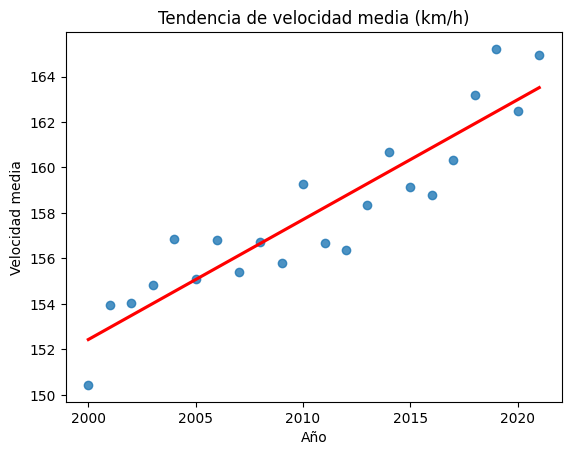

In [23]:
sns.regplot(x="year", y="speed", data=moto_gp, ci=None, line_kws={"color": "red"})
plt.title("Tendencia de velocidad media (km/h)")
plt.xlabel("Año")
plt.ylabel("Velocidad media")
plt.savefig('img/reglin.jpg', dpi=300)
plt.show()

### Análisis rendimiento pilotos españoles en sus circuitos

Un hecho a comprobar que se nos puede antojar interesante es el de si un piloto tiene mejores actuaciones cuando compite en circuitos de su propio país. Teniendo en cuenta que, por lo general, la formación de los pilotos en categorías inferiores pasa, sobre todo, por competiciones nacionales en las que se utilizan circuitos que también son usados en los campeonatos mundiales, nos da a entender que un piloto español vaya a tener cierta venaja sobre un extranjero en los circuitos patrios (Montmeló, Jerez, Aragón y Valencia) por el hecho de contar con mayor experiencia pilotando sobre éstos.

Sin embargo, cómo podemos saber si los pilotos españoles rinden más que los extranjeros en sus circuitos? Podríamos utilizar las puntuaciones obtenidas en carrera y su frecuencia, que vendría a ser lo mismo que utilizar la frecuencia de cada posición en carrera. En este caso, resulta más cómodo utilizar puntuaciones debido a que, del puesto decimoquinto hacia abajo los pilotos no puntúan (puntuación de 0) y no siempre hay el mismo número de pilotos compitiendo en cada carrera. Así pues, hacer muestras de posiciones en carrera de pilotos en donde algunos participan en una competición con cuarenta corredores otros en otra con sólo dieciocho puede complicar el proceso, cosa que no ocurre si simplemente trabajamos con la variable de puntos obtenidos por gran premio (contamos además con la ventaja de que el sistema de puntuación es idéntico en las tres categorías).

Utilizaremos la tabla 'data' que recoge datos desde la temporada 2000 hasta la temporada 2021. Seleccionaremos los valores correspondientes a los pilotos españoles y dividiremos esta nueva tabla en dos partes: 

1) - Resultados de pilotos españoles en Jerez, Montmeló, Aragón y Valencia
2) - Resultados de pilotos españoles en el resto de circuitos

Seleccionamos la variable 'points' de ambas tablas y tomamos una muestra de ellas. Como tenemos que seleccionar dos muestras de idéntica longitud, las tomaremos de manera aleatoria con una longitud de 1400. Tenemos, por tanto:

- Muestra A: lista con longitud 1400 de puntos de pilotos españoles en circuitos españoles
- Muestra B: lista con longitud 1400 de puntos de pilotos españoles en el resto de circuitos

Las muestras no pueden seguir en ningún caso una distribución normal porque se trata de datos discretos y categóricos (25, 20, 16, 13, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1 y 0), por lo que podemos aplicarle la prueba U de Mann-Whitney para comprobar si provienen de la misma distribución o no. No obstante, hemos de ver si se cumplen los requisitos para poder aplicar Mann-Whitney:

- Las observaciones en las muestras A y B se pueden ordenar. SÍ
- Las observaciones en las muestras A y B son independientes. SÍ.



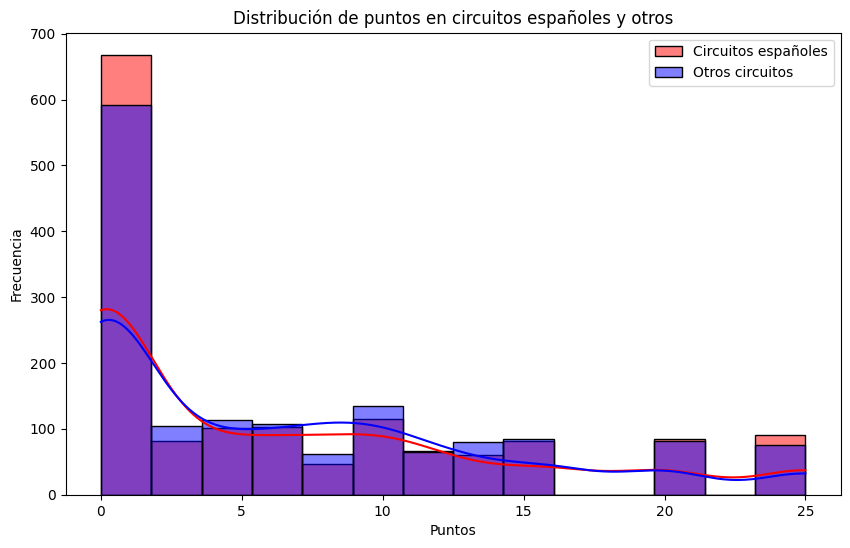

In [40]:
pilotos_espanoles = data[data['country'] == 'ES']
pilotos_espanoles_circ_esp = pilotos_espanoles[pilotos_espanoles['circuit_name'].isin(['Ricardo Tormo', 'Jerez', 'Catalunya', 'Aragón'])]
pilotos_espanoles_circ_NO_esp = pilotos_espanoles[~pilotos_espanoles['circuit_name'].isin(['Ricardo Tormo', 'Jerez', 'Catalunya', 'Aragón'])]
muestra_A = pilotos_espanoles_circ_esp['points'].sample(1500)
muestra_B = pilotos_espanoles_circ_NO_esp['points'].sample(1500)

plt.figure(figsize=(10, 6))
sns.histplot(muestra_A, color='red', label='Circuitos españoles', kde=True)
sns.histplot(muestra_B, color='blue', label='Otros circuitos', kde=True)
plt.title('Distribución de puntos en circuitos españoles y otros')
plt.xlabel('Puntos')
plt.ylabel('Frecuencia')
plt.legend()
plt.savefig('img/circ_esp.jpg', dpi=300)
plt.show()

C:\Users\estev\AppData\Local\Temp\ipykernel_18316\3988308705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_A, palette='Set3')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\3988308705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_B, palette='Set1')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\3988308705.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_B, palette='Set1', alpha=0.5)
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\3988308705.py:16: FutureWarning: 

Passing `palette` wit

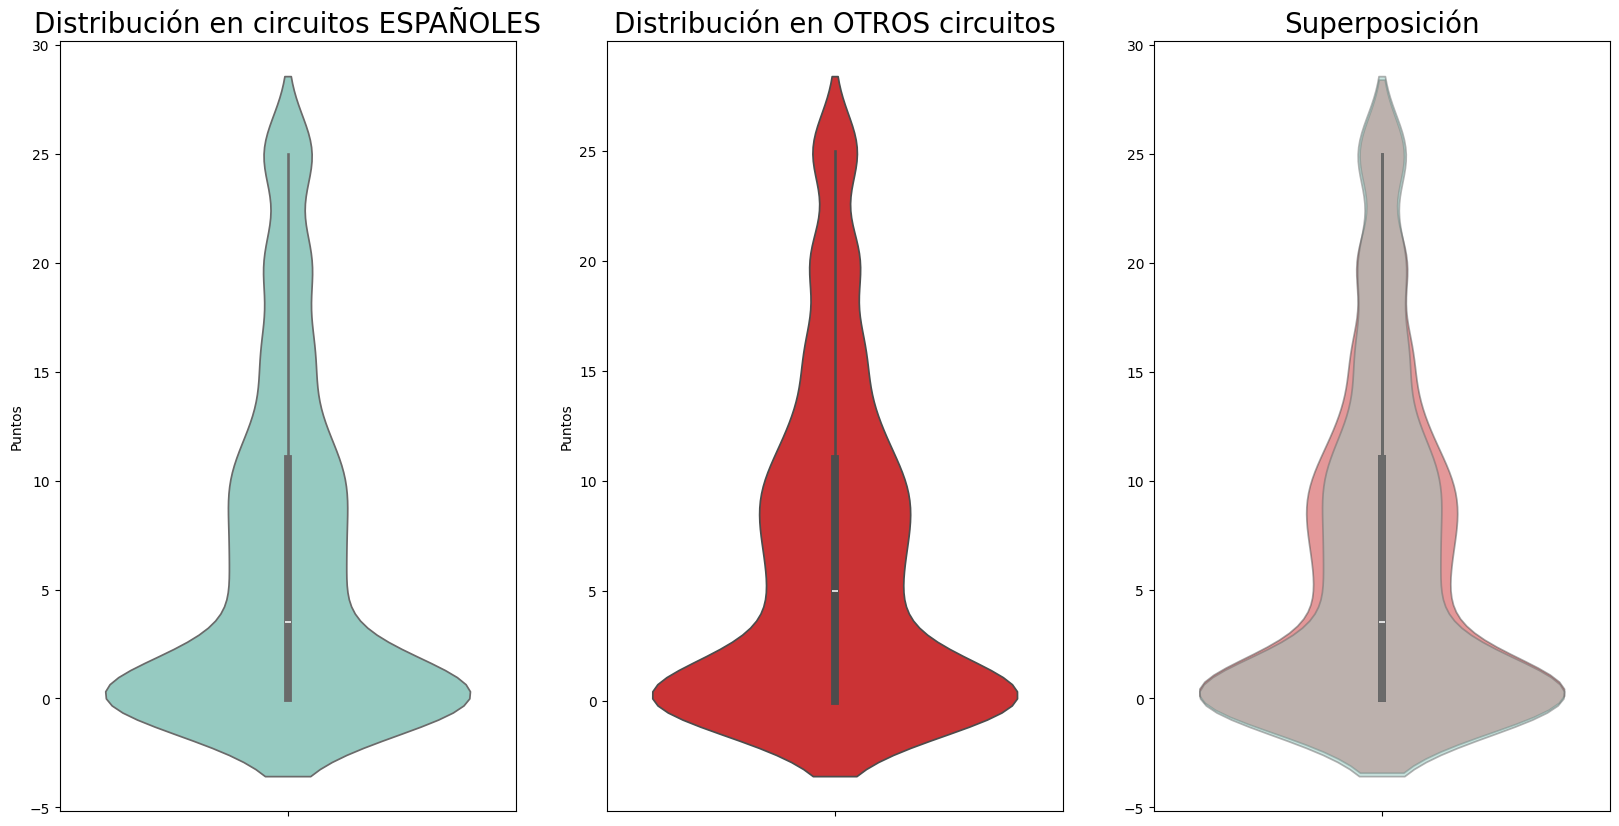

In [42]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.violinplot(muestra_A, palette='Set3')
plt.title('Distribución en circuitos ESPAÑOLES', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')

plt.subplot(1, 3, 2)
sns.violinplot(muestra_B, palette='Set1')
plt.title('Distribución en OTROS circuitos', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')

plt.subplot(1, 3, 3)
sns.violinplot(muestra_B, palette='Set1', alpha=0.5)
sns.violinplot(muestra_A, palette='Set3', alpha=0.5)
plt.title('Superposición', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.savefig('img/circ_esp_vio.jpg', dpi=300)
plt.show()

Realizamos la prueba U de Mann-Whitney. Como vemos, no se puede afirmar que las puntuaciones en las dos muestras pertenezcan a distintas distribuciones. 

Concluímos, pues, que el rendimiento de los pilotos españoles en circuitos españoles no necesariamente es mejor.

In [ ]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(muestra_A, muestra_B)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar la hipótesis nula. Los pilotos españoles parecen rendir igual en sus circuitos que en el resto.')
else:
	print('Se descarta la Hipótesis Nula. Los pilotos españoles rinden diferente en los circuitos españoles.')

stat=1099291.500, p=0.263
No podemos rechazar la hipótesis nula. Los pilotos españoles parecen rendir igual en sus circuitos que en el resto.


Y qué ocurre si escogemos los resultados de un piloto en concreto? Pues vamos a ver dos ejemplos:

- Ejemplo A: Dani Pedrosa
- Ejemplo B: Álvaro Bautista

### Ejemplo A: Dani Pedrosa

C:\Users\estev\AppData\Local\Temp\ipykernel_18316\1002885758.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_A, palette='Set2')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\1002885758.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_B, palette='Set1')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\1002885758.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_B, palette='Set2', alpha=0.5)
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\1002885758.py:23: FutureWarning: 

Passing `palette` w

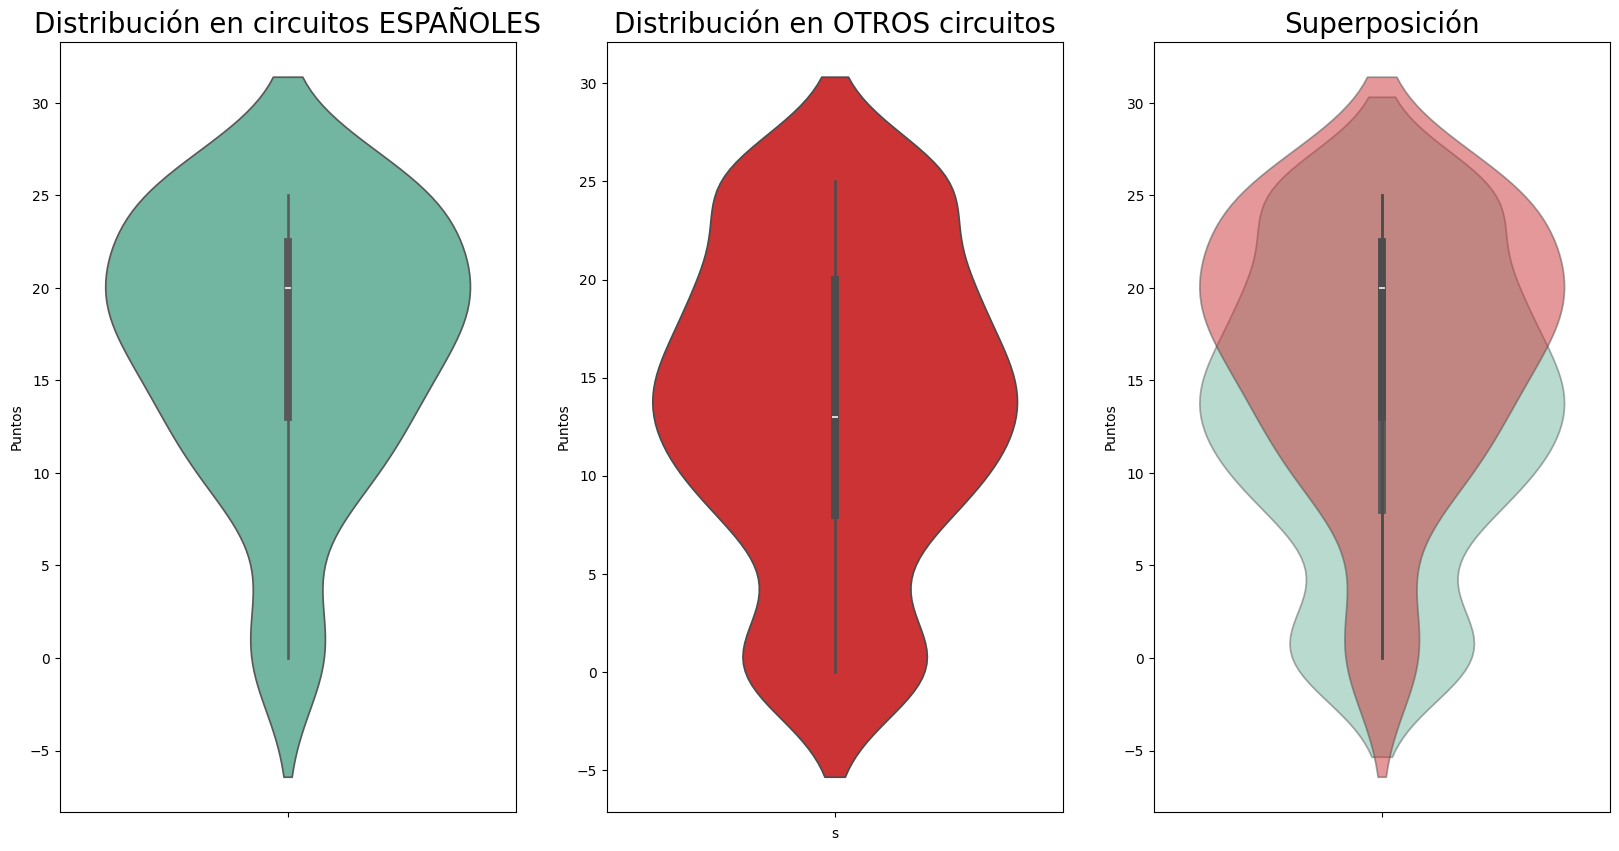

In [ ]:
pedrosa = data[data['rider_name'] == 'Pedrosa, Dani']
pedrosa_espana = pedrosa[pedrosa['circuit_name'].isin(['Ricardo Tormo', 'Jerez', 'Catalunya', 'Aragón'])]
pedrosa_fuera = pedrosa[~pedrosa['circuit_name'].isin(['Ricardo Tormo', 'Jerez', 'Catalunya', 'Aragón'])]
muestra_A = pedrosa_espana['points']
muestra_B = pedrosa_fuera['points']


plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.violinplot(muestra_A, palette='Set2')
plt.title('Distribución en circuitos ESPAÑOLES', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')

plt.subplot(1, 3, 2)
sns.violinplot(muestra_B, palette='Set1')
plt.title('Distribución en OTROS circuitos', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')

plt.subplot(1, 3, 3)
sns.violinplot(muestra_B, palette='Set2', alpha=0.5)
sns.violinplot(muestra_A, palette='Set1', alpha=0.5)
plt.title('Superposición', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')
plt.savefig('img/circ_pedr_vio.jpg', dpi=300)
plt.show()

In [46]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(muestra_A, muestra_B)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar la hipótesis nula. Dani Pedrosa parece rendir igual en sus circuitos que en el resto.')
else:
	print('Se descarta la Hipótesis Nula. Dani Pedrosa rinde mejor en los circuitos españoles que en los circuítos extranjeros.')

stat=8493.000, p=0.003
Se descarta la Hipótesis Nula. Dani Pedrosa rinde mejor en los circuitos españoles que en los circuítos extranjeros.


### Ejemplo B: Álvaro Bautista

C:\Users\estev\AppData\Local\Temp\ipykernel_18316\56281586.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_A, palette='Set2')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\56281586.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_B, palette='Set1')
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\56281586.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(muestra_B, palette='Set2', alpha=0.5)
C:\Users\estev\AppData\Local\Temp\ipykernel_18316\56281586.py:23: FutureWarning: 

Passing `palette` without a

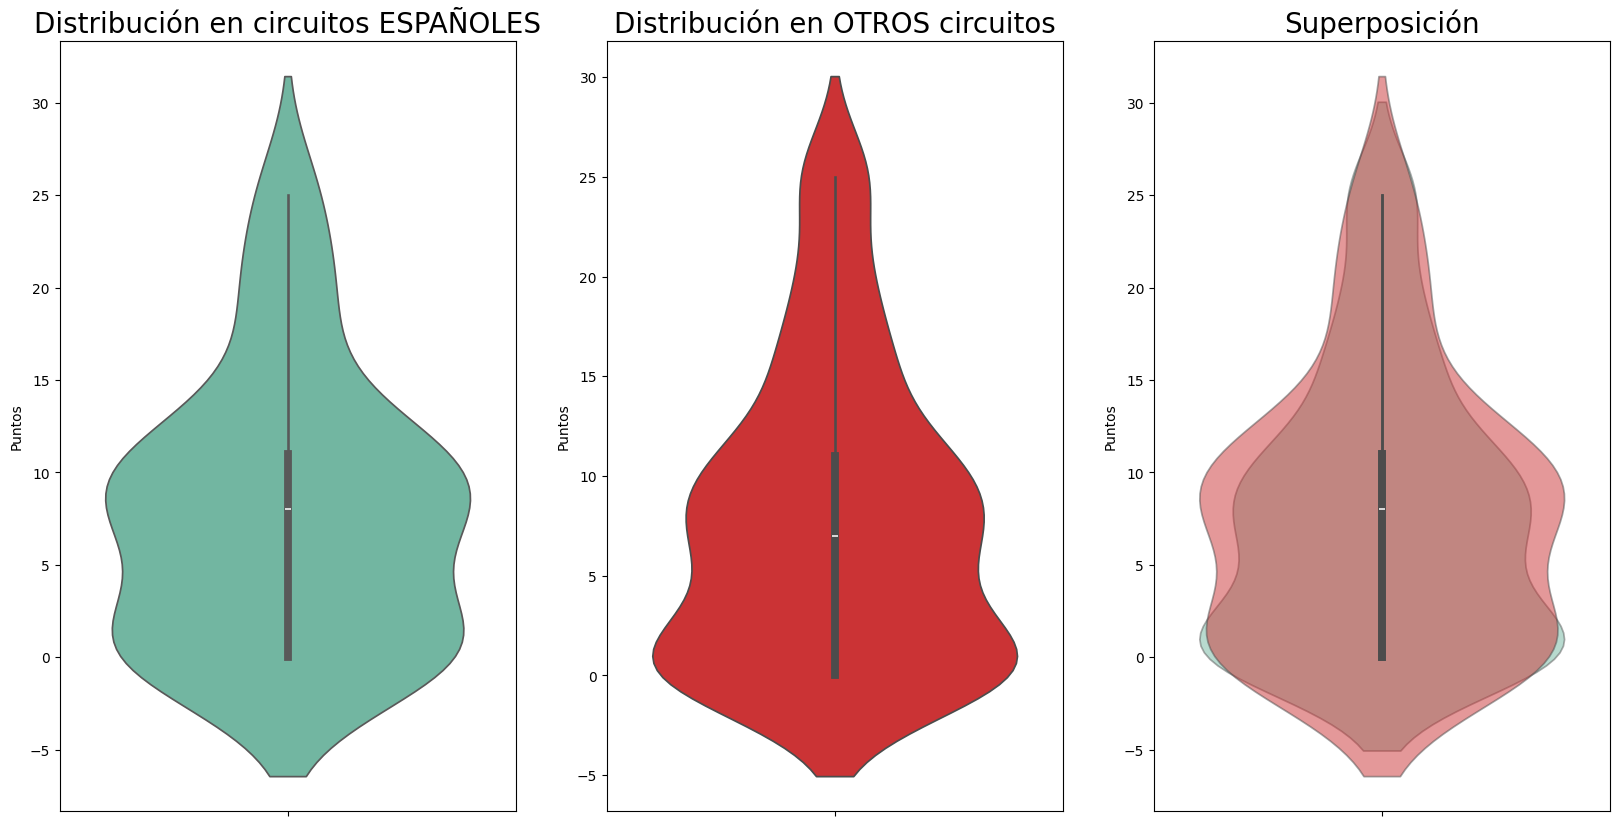

In [49]:
bautista = data[data['rider_name'] == 'Bautista, Alvaro']
bautista_espana = bautista[bautista['circuit_name'].isin(['Ricardo Tormo', 'Jerez', 'Catalunya', 'Aragón'])]
bautista_fuera = bautista[~bautista['circuit_name'].isin(['Ricardo Tormo', 'Jerez', 'Catalunya', 'Aragón'])]
muestra_A = bautista_espana['points']
muestra_B = bautista_fuera['points']


plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
sns.violinplot(muestra_A, palette='Set2')
plt.title('Distribución en circuitos ESPAÑOLES', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')

plt.subplot(1, 3, 2)
sns.violinplot(muestra_B, palette='Set1')
plt.title('Distribución en OTROS circuitos', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')

plt.subplot(1, 3, 3)
sns.violinplot(muestra_B, palette='Set2', alpha=0.5)
sns.violinplot(muestra_A, palette='Set1', alpha=0.5)
plt.title('Superposición', fontsize=20)
plt.xlabel('')
plt.ylabel('Puntos')
plt.savefig('img/circ_bau_vio.jpg', dpi=300)
plt.show()

In [48]:
stat, p = mannwhitneyu(muestra_A, muestra_B)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar la hipótesis nula. Álvaro Bautista parece rendir igual en sus circuitos que en el resto.')
else:
	print('Se descarta la Hipótesis Nula. Álvaro Bautista rinde mejor en los circuitos españoles que en los circuítos extranjeros.')

stat=6031.000, p=0.929
No podemos rechazar la hipótesis nula. Álvaro Bautista parece rendir igual en sus circuitos que en el resto.


Como vemos, hay pilotos a los que se les dá mejor los circuitos nacionales y otros que simplemente no notan ninguna diferencia entre correr en casa o hacerlo fuera. 

### Análisis cambio de paradigma

## Modelo no supervisado para clasificar circuitos

In [23]:
circuitos = pd.read_csv('data/circuitos_2008.csv')
circuitos2 = circuitos[['nombre_circuito', 'longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'vuelta_rapida_carrera', 'maxima', 'desnivel']]
circuitos2[['segundos', 'milesimas']] = circuitos2['vuelta_rapida_carrera'].str.split('.', expand=True)
circuitos2['segundos'] = pd.to_datetime(circuitos2['segundos'], format='%M:%S')
circuitos2['segundos'] = (circuitos2['segundos'].dt.minute * 60 + circuitos2['segundos'].dt.second)*1000
circuitos2['tiempo'] = circuitos2['segundos'] + circuitos2['milesimas'].astype(int)
circuitos2.drop(columns=['vuelta_rapida_carrera', 'segundos', 'milesimas'], inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']] = scaler.fit_transform(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])
circuitos3 = circuitos2
circuitos3.to_csv('data/circuitos3.csv', index=False)


C:\Users\estev\AppData\Local\Temp\ipykernel_10168\2228316955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2[['segundos', 'milesimas']] = circuitos2['vuelta_rapida_carrera'].str.split('.', expand=True)
C:\Users\estev\AppData\Local\Temp\ipykernel_10168\2228316955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2[['segundos', 'milesimas']] = circuitos2['vuelta_rapida_carrera'].str.split('.', expand=True)
C:\Users\estev\AppData\Local\Temp\ipykernel_10168\2228316955.py:4: SettingWith

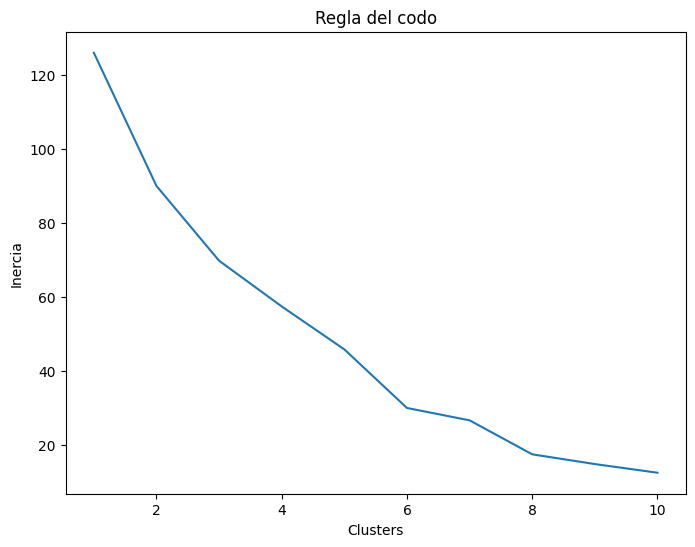

In [27]:
from sklearn.cluster import KMeans
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Regla del codo')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inercia')

ax.annotate('Posible candidato', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Posible candidato', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.show()

Los mejores codos aparecen con 2 clusters y con 6 clusters, de manera que probaremos con los dos tipos.

#### Modelo KMeans con 2 clusters

C:\Users\estev\AppData\Local\Temp\ipykernel_19980\135028927.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2['cluster'] = kmeans.fit_predict(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])


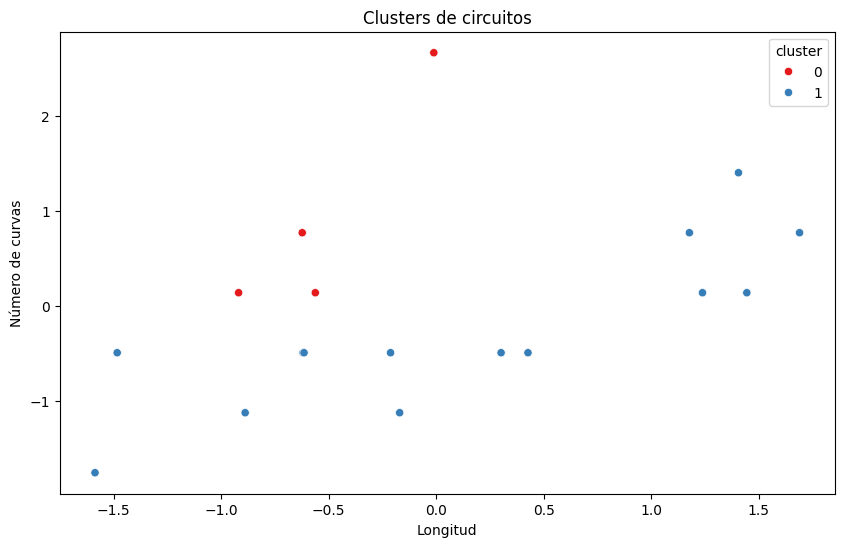

In [31]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
circuitos2['cluster'] = kmeans.fit_predict(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=circuitos2, x='longitud', y='num_curvas', hue='cluster', palette='Set1')
plt.title('Clusters de circuitos')
plt.xlabel('Longitud')
plt.ylabel('Número de curvas')
plt.show()

#### Modelo KMeans con 6 clusters

C:\Users\estev\AppData\Local\Temp\ipykernel_19980\3331004145.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2['cluster'] = kmeans.fit_predict(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])


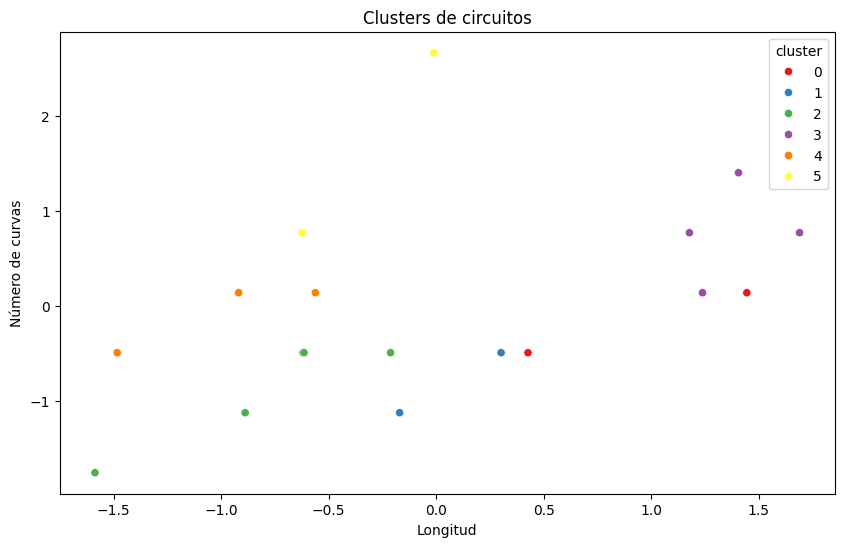

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)
circuitos2['cluster'] = kmeans.fit_predict(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=circuitos2, x='longitud', y='num_curvas', hue='cluster', palette='Set1')
plt.title('Clusters de circuitos')
plt.xlabel('Longitud')
plt.ylabel('Número de curvas')
plt.show()

### Clusters a partir del Análisis de Componentes Principales

In [49]:
from sklearn.mixture import GaussianMixture
from sklearn.utils.extmath import row_norms
from timeit import default_timer as timer
from sklearn.datasets import make_blobs


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
circuitos2[['pca1', 'pca2']] = pca.fit_transform(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])

print(pca.components_)

[[-0.46856603 -0.31781351  0.06226418 -0.40701905 -0.44048187  0.31051432
  -0.46846098]
 [-0.01314053  0.61816265 -0.11831138 -0.47325895 -0.38117777 -0.48341856
   0.02721491]]


C:\Users\estev\AppData\Local\Temp\ipykernel_19980\3724158988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2[['pca1', 'pca2']] = pca.fit_transform(circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel', 'tiempo']])


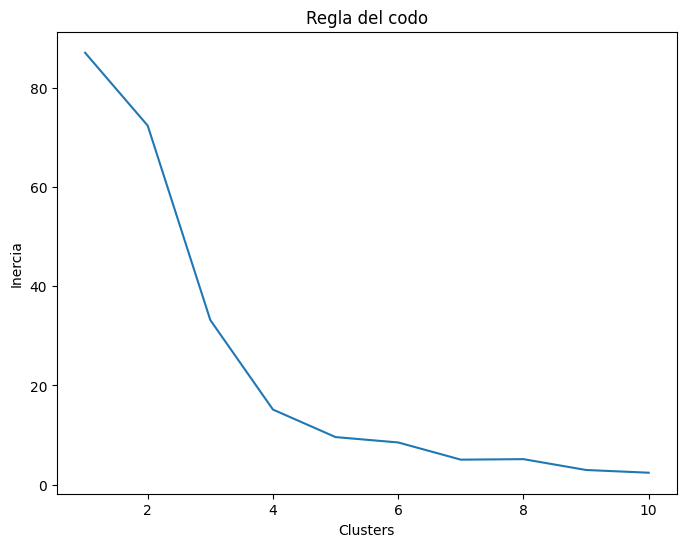

In [57]:
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(circuitos2[['pca1', 'pca2']])
    clusters.append(km.inertia_)

fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Regla del codo')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inercia')

ax.annotate('Posible candidato', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Posible candidato', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
plt.savefig('img/codo_pca.jpg', dpi=300)
plt.show()

Aquí queda claro que el mejor número de clusters es 4, así que repetimos el proceso anterior para ese número.

C:\Users\estev\AppData\Local\Temp\ipykernel_19980\1329770971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2['cluster'] = kmeans.fit_predict(circuitos2[['pca1', 'pca2']])


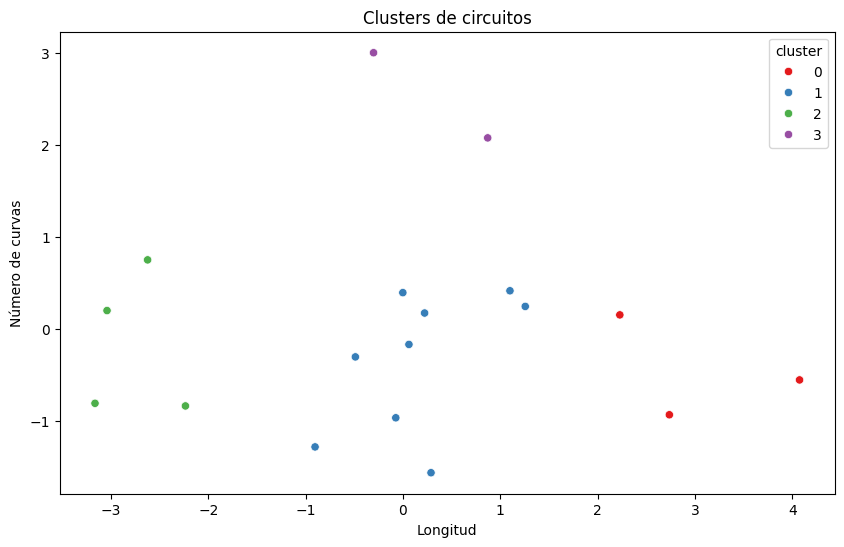

In [58]:
kmeans = KMeans(n_clusters=4)
circuitos2['cluster'] = kmeans.fit_predict(circuitos2[['pca1', 'pca2']])

plt.figure(figsize=(10, 6))
sns.scatterplot(data=circuitos2, x='pca1', y='pca2', hue='cluster', palette='Set1')
plt.title('Clusters de circuitos')
plt.xlabel('Longitud')
plt.ylabel('Número de curvas')
plt.show()

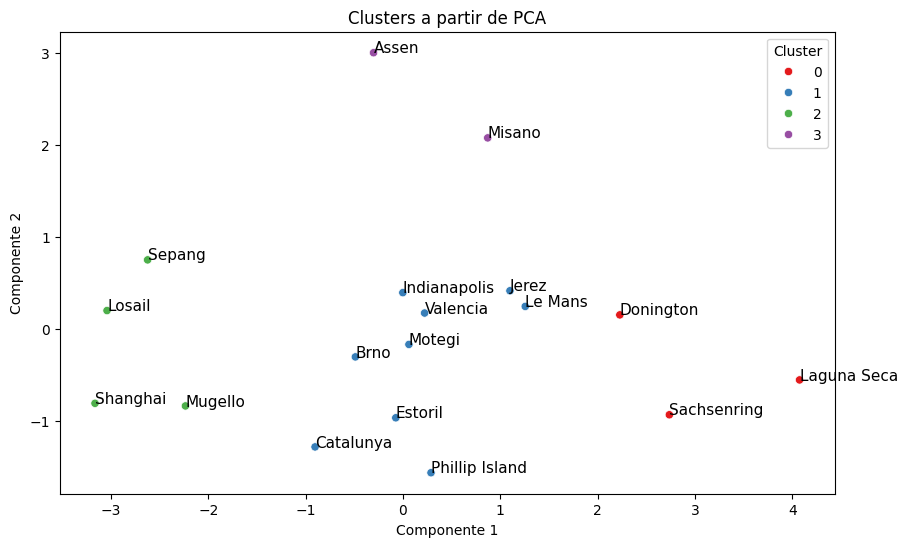

In [64]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=circuitos2, x='pca1', y='pca2', hue='cluster', palette='Set1')
for i in range(len(circuitos2)):
    plt.text(
        circuitos2['pca1'].iloc[i],  
        circuitos2['pca2'].iloc[i],  
        circuitos2['nombre_circuito'].iloc[i], 
        fontsize=11, color='black'
    )

plt.title('Clusters a partir de PCA')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend(title="Cluster")
plt.savefig('img/clusters_pca.jpg', dpi=300)
plt.show()

## Modelo de regresion 

Creamos un modelo de aprendizaje supervisado que nos permita calcular el tiempo por vuelta de un circuito.

In [10]:
circuitos3 = pd.read_csv('data/circuitos3.csv')
circuitos3 = circuitos3.loc[circuitos3.index.repeat(10)]
circuitos3['longitud'] = circuitos3['longitud'] + np.random.normal(0, 0.04, len(circuitos3))
circuitos3['num_curvas'] = circuitos3['num_curvas'] + np.random.normal(0, 0.04, len(circuitos3))
circuitos3['num_curvas_izq'] = circuitos3['num_curvas_izq'] + np.random.normal(0, 0.04, len(circuitos3))
circuitos3['recta_mas_larga'] = circuitos3['recta_mas_larga'] + np.random.normal(0, 0.04, len(circuitos3))
circuitos3['maxima'] = circuitos3['maxima'] + np.random.normal(0, 0.04, len(circuitos3))
circuitos3['desnivel'] = circuitos3['desnivel'] + np.random.normal(0, 0.04, len(circuitos3))
circuitos3['tiempo'] = circuitos3['tiempo'] + np.random.normal(0, 0.04, len(circuitos3))
circuitos3.drop(columns=['nombre_circuito'], inplace=True)

In [13]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Hacer un train_test_split
X_train, X_test, y_train, y_test = train_test_split(circuitos3.drop(columns=['tiempo']), circuitos3['tiempo'], test_size=0.3, random_state=42)


In [14]:
# pasar a arrays X_train, X_test, y_train, y_test
if not isinstance(X_train, np.ndarray):
    X_train = X_train.to_numpy()
else:
    print("X_train ya es numpy")

if not isinstance(X_test, np.ndarray):
    X_test = X_test.to_numpy()
else:
    print("X_test ya es numpy")

if not isinstance(y_train, np.ndarray):
    y_train = y_train.to_numpy()
else:
    print("y_train ya es numpy")

if not isinstance(y_test, np.ndarray):
    y_test = y_test.to_numpy()
else:
    print("y_test ya es numpy")


In [15]:

#Partición de datos de entrenamiento para analizar modelos
n_splits = 5
kf = KFold(n_splits = n_splits)

#Diccionario de modelos
models={'OLS': LinearRegression(),
        'SVR': SVR(),
        'Ridge': Ridge(),
        'Lasso': Lasso(),
        'ElasticNet': ElasticNet(),
        'RandomForest': RandomForestRegressor(),
        'XGB': GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber', random_state =5)
       }

#Bucle
for name, model in models.items():
  print('Probamos modelo {}:'.format(name))
  rsme = []
  for train_idx, test_idx in kf.split(X_train, y_train):
    model.fit(X_train[train_idx,:], y_train[train_idx])
    y_pred = np.expm1(model.predict(X_train[test_idx,:]))
    rsme.append(np.sqrt(sum((np.expm1(y_train[test_idx])-y_pred)**2)))
  print(f'El RMSE medio de las estimaciones es: {np.mean(rsme):.2f}')

Probamos modelo OLS:
El RMSE medio de las estimaciones es: 2.89
Probamos modelo SVR:
El RMSE medio de las estimaciones es: 1.05
Probamos modelo Ridge:
El RMSE medio de las estimaciones es: 2.83
Probamos modelo Lasso:
El RMSE medio de las estimaciones es: 9.24
Probamos modelo ElasticNet:
El RMSE medio de las estimaciones es: 7.75
Probamos modelo RandomForest:
El RMSE medio de las estimaciones es: 1.16
Probamos modelo XGB:
El RMSE medio de las estimaciones es: 1.43


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

circuitos = pd.read_csv('data/circuitos_2008.csv')
circuitos2 = circuitos[['nombre_circuito', 'longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'vuelta_rapida_carrera', 'maxima', 'desnivel']]
circuitos2[['segundos', 'milesimas']] = circuitos2['vuelta_rapida_carrera'].str.split('.', expand=True)
circuitos2['segundos'] = pd.to_datetime(circuitos2['segundos'], format='%M:%S')
circuitos2['segundos'] = (circuitos2['segundos'].dt.minute * 60 + circuitos2['segundos'].dt.second)*1000
circuitos2['tiempo'] = circuitos2['segundos'] + circuitos2['milesimas'].astype(int)
circuitos2.drop(columns=['vuelta_rapida_carrera', 'segundos', 'milesimas'], inplace=True)

X = circuitos2[['longitud', 'num_curvas', 'num_curvas_izq', 'recta_mas_larga', 'maxima', 'desnivel']]
y = circuitos2['tiempo']

# pasar a arrays X e y
if not isinstance(X, np.ndarray):
    X = X.to_numpy()
else:
    print("X ya es numpy")

if not isinstance(y, np.ndarray):
    y = y.to_numpy()
else:
    print("X ya es numpy")


C:\Users\estev\AppData\Local\Temp\ipykernel_10168\1591070856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2[['segundos', 'milesimas']] = circuitos2['vuelta_rapida_carrera'].str.split('.', expand=True)
C:\Users\estev\AppData\Local\Temp\ipykernel_10168\1591070856.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  circuitos2[['segundos', 'milesimas']] = circuitos2['vuelta_rapida_carrera'].str.split('.', expand=True)
C:\Users\estev\AppData\Local\Temp\ipykernel_10168\1591070856.py:9: SettingWith

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))

In [31]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train_scaled.ravel())

RandomForestRegressor(random_state=42)

In [32]:
y_pred_scaled = model.predict(X_test_scaled)

y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

print("Predicciones en la escala original:", y_pred_original)

Predicciones en la escala original: [[114466.04]
 [ 94277.55]
 [100075.59]
 [113872.03]
 [113975.52]
 [ 95106.37]]


In [33]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
model_RF.score(X_test, y_test)

import joblib
joblib.dump(model_RF, 'model_RF.pkl')

['model_RF.pkl']